In [1]:
import pandas as pd

In [2]:
orig_df = pd.read_csv('./kaggle_data/train.csv')
orig_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# These are the manually picked columns that are all categorical
categorical_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
                    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                    'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
                    'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
                    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 
                    'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

In [4]:
# Cast all of these columns to type category
cat_df = orig_df.copy()
cat_df[categorical_cols] = orig_df[categorical_cols].apply(lambda x: x.astype('category'))
cat_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Select category columns, turn them into a numerical value
norm_df = cat_df.copy()
norm_df[categorical_cols] = cat_df[categorical_cols].apply(lambda x: x.cat.codes)
norm_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,-1,3,3,0,...,0,-1,-1,-1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,-1,3,3,0,...,0,-1,-1,-1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,-1,0,3,0,...,0,-1,-1,-1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,-1,0,3,0,...,0,-1,-1,-1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,-1,0,3,0,...,0,-1,-1,-1,0,12,2008,8,4,250000


In [6]:
# This is how you would look up the numerical categories against their actual categories
cat_df['SaleType'].cat.categories

Index(['COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD'], dtype='object')

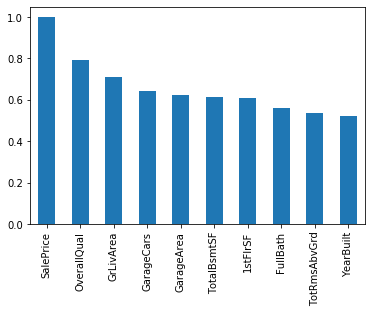

In [14]:
# Highest positive correlations to SalePrice (SalePrice correlation is trivial)
norm_df.corr()['SalePrice'].sort_values(ascending=False).head(10).plot(kind='bar')

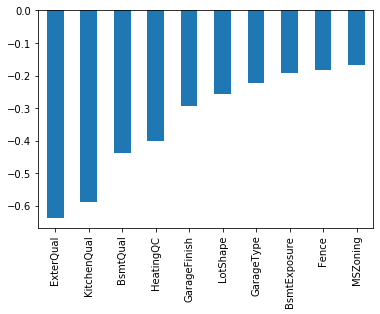

In [8]:
# Largest negative correlations to SalePrice
norm_df.corr()['SalePrice'].sort_values().head(10).plot(kind='bar')

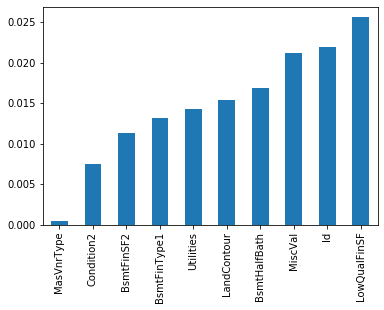

In [9]:
# Weakest correlations to SalePrice (closest to zero correlations)
norm_df.corr()['SalePrice'].abs().sort_values().head(10).plot(kind='bar')

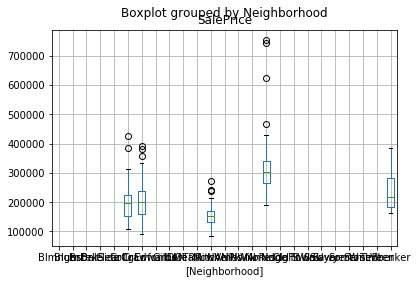

In [10]:
# Boxplots for neighborhood prices
neighborhoods = cat_df.Neighborhood.unique()[:5]
cat_df.loc[cat_df.Neighborhood.isin(neighborhoods), ['Neighborhood', 'SalePrice']].boxplot(by='Neighborhood')

In [11]:
cat_df[['Neighborhood', 'SalePrice']]

,Neighborhood,SalePrice
0,CollgCr,208500
1,Veenker,181500
2,CollgCr,223500
3,Crawfor,140000
4,NoRidge,250000
...,...,...
1455,Gilbert,175000
1456,NWAmes,210000
1457,Crawfor,266500
1458,NAmes,142125


In [12]:
cat_df.Neighborhood.unique()[:5]

[CollgCr, Veenker, Crawfor, NoRidge, Mitchel]
Categories (25, object): [CollgCr, Veenker, Crawfor, NoRidge, ..., Blmngtn, BrDale, SWISU, Blueste]

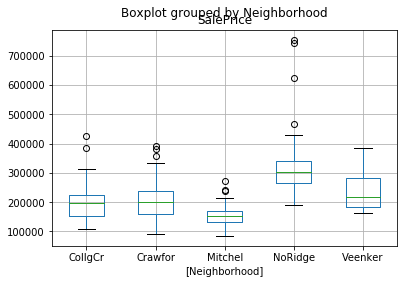

In [13]:
neighborhoods = cat_df.Neighborhood.unique()[:5]
temp_df = cat_df.copy()
temp_df['Neighborhood'] = temp_df['Neighborhood'].astype(str)
temp_df.loc[temp_df.Neighborhood.isin(neighborhoods), ['Neighborhood', 'SalePrice']].boxplot(by='Neighborhood')